# **The purpose of this file is to demonstrate use of jupyter for AI4PH course**
### This was created on 2024-02-13 to fulfil the requirements for the AI4PH course - The Tools for Data Science: Notebooks and Versioning.
### Data for this assignment were available: https://data.ontario.ca/dataset/deaths-involving-covid-19-by-vaccination-status/resource/2aa6e2ce-40de-4910-a737-81762e014b0b


## *Set up*
### Import relevant packages

In [1]:
#import relevant python packages
!pip install bs4
!pip install selenium
!pip install pandas
!pip install html5lib
!pip install matplotlib
!pip install scikit-learn
!pip install lxml

## Import data

In [40]:
import requests

In [46]:
url = "https://data.ontario.ca/dataset/1375bb00-6454-4d3e-a723-4ae9e849d655/resource/2aa6e2ce-40de-4910-a737-81762e014b0b/download/deaths_by_vac_status.csv"
filename = 'deaths_by_vac_status.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

In [47]:
with open(filename, mode="wb") as file:
    file.write(response.content)

In [48]:
import pandas as pd
filename = 'deaths_by_vac_status.csv'
vax_stat = pd.read_csv(filename)

In [49]:
vax_stat.head()

,date,age_group,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
0,2021-03-01,0-4yrs,0.0,0.0,0.00
1,2021-03-01,5-11yrs,0.0,0.0,0.00
2,2021-03-01,12-17yrs,0.0,0.0,0.00
3,2021-03-01,18-39yrs,0.0,0.0,0.00
4,2021-03-01,40-59yrs,0.0,0.0,0.02


## Descriptives

In [50]:
vax_stat.dtypes

date                             object
age_group                        object
deaths_boost_vac_rate_7ma       float64
deaths_full_vac_rate_7ma        float64
deaths_not_full_vac_rate_7ma    float64
dtype: object

In [51]:
vax_stat.describe()

,deaths_boost_vac_rate_7ma,deaths_full_vac_rate_7ma,deaths_not_full_vac_rate_7ma
count,7469.000000,7469.000000,7469.000000
mean,0.027142,0.027751,0.305552
std,0.072875,0.118505,1.323194
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.010000,0.010000,0.040000
max,0.810000,1.970000,18.330000


In [63]:
vax_stat['age_group'].value_counts()

age_group
ALL         1074
60+         1073
18-39yrs    1065
40-59yrs    1065
0-4yrs      1064
5-11yrs     1064
12-17yrs    1064
Name: count, dtype: int64

In [64]:
vax_stat['age_group'].value_counts(normalize=True)

age_group
ALL         0.143794
60+         0.143660
18-39yrs    0.142589
40-59yrs    0.142589
0-4yrs      0.142455
5-11yrs     0.142455
12-17yrs    0.142455
Name: proportion, dtype: float64

<Axes: xlabel='date'>

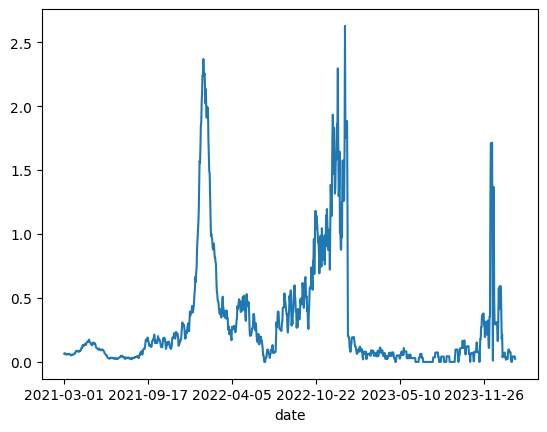

In [70]:
#Death rate for those not fully vaccinated
vax_stat.groupby([vax_stat['date']])['deaths_not_full_vac_rate_7ma'].mean().plot()

<Axes: xlabel='date'>

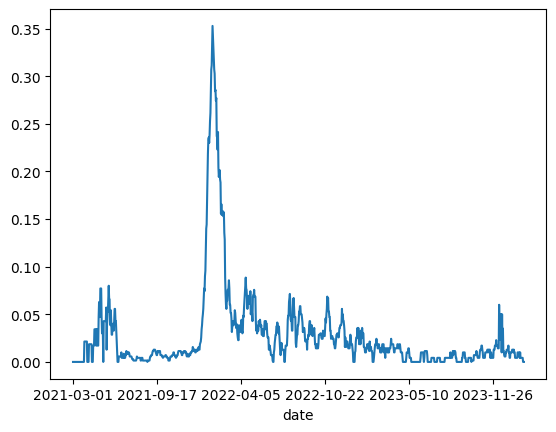

In [75]:
#Compared to death rate for those who are fully vaccinated
vax_stat.groupby([vax_stat['date']])['deaths_full_vac_rate_7ma'].mean().plot()

In [74]:
vax_stat.groupby('age_group', as_index=False)['deaths_not_full_vac_rate_7ma'].mean()

,age_group,deaths_full_vac_rate_7ma
0,0-4yrs,0.000000
1,12-17yrs,0.000132
2,18-39yrs,0.000601
3,40-59yrs,0.006019
4,5-11yrs,0.000000
5,60+,0.158425
6,ALL,0.028017


In [72]:
vax_stat.groupby('age_group', as_index=False)['deaths_full_vac_rate_7ma'].mean()

,age_group,deaths_full_vac_rate_7ma
0,0-4yrs,0.000000
1,12-17yrs,0.000132
2,18-39yrs,0.000601
3,40-59yrs,0.006019
4,5-11yrs,0.000000
5,60+,0.158425
6,ALL,0.028017


# High Level findings

In early 2021 there are a number of deaths occuring among those fully vaccinated. This may be due to vaccine eligibility at the time and overall risk of exposure, rather than vaccine status itself. Future work could consider exploration in this area. 

There was a peak in the death rate in winter of 2021/2022 for both those fully and not fully vaccinated, likely due to variant at the time. In the following months, the death rate was lower among those fully vaccinated compared to those without. 

Next steps should also evaluate age-specific death rates over time. 